In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [17]:
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/Users/Daniyar/Mountains/Data/df_final.csv', index_col="time")

In [3]:
# Define features and target
X = df.drop(columns=['generation solar','generation wind onshore'])
y_solar = df['generation solar']
y_wind = df['generation wind onshore']

In [4]:
def split_by_date(X,train_end_date):
    if not isinstance(train_end_date, pd.Timestamp):
        train_end_date = pd.Timestamp(train_end_date)

    # Convert index of X and y to Timestamp objects if they are strings
    if isinstance(X.index[0], str):
        X.index = pd.to_datetime(X.index)
        
    X_train = X[X.index <= train_end_date]
    X_test = X[X.index > train_end_date]
    
    return X_train, X_test

train_end_date = pd.to_datetime('2017-12-31 23:00:00+00:00')
X_train, X_test = split_by_date(X,train_end_date)

In [5]:
y_solar_train, y_solar_test = split_by_date(y_solar, train_end_date)

In [6]:
y_wind_train, y_wind_test = split_by_date(y_wind, train_end_date)

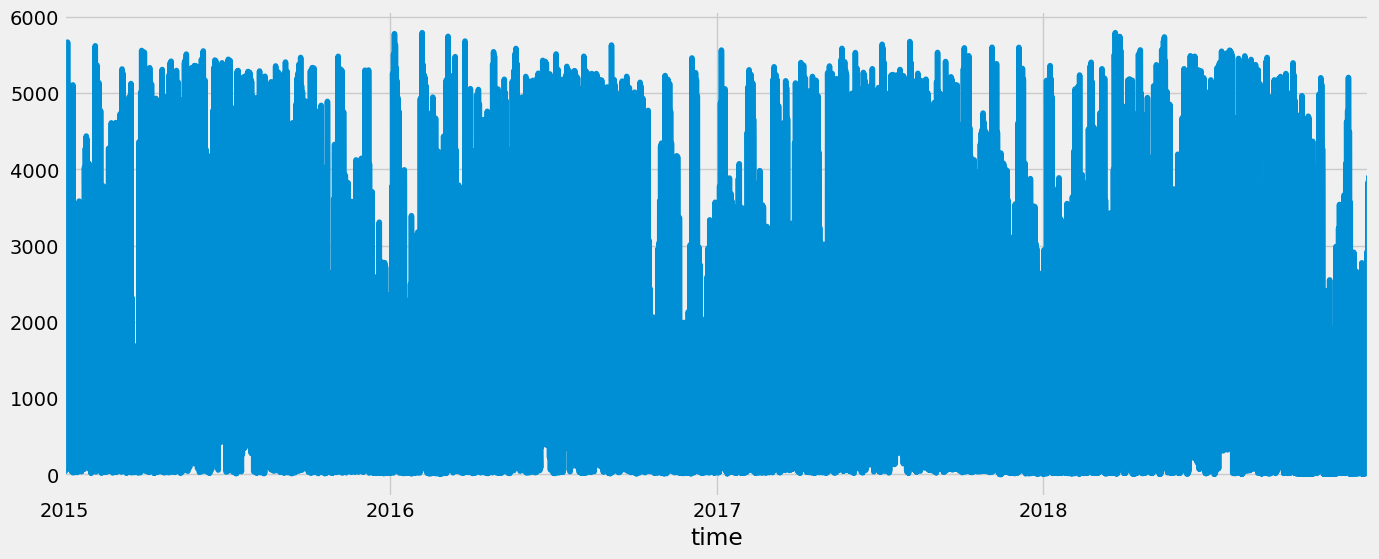

In [7]:
y_solar.plot(figsize=(15, 6))
plt.show()

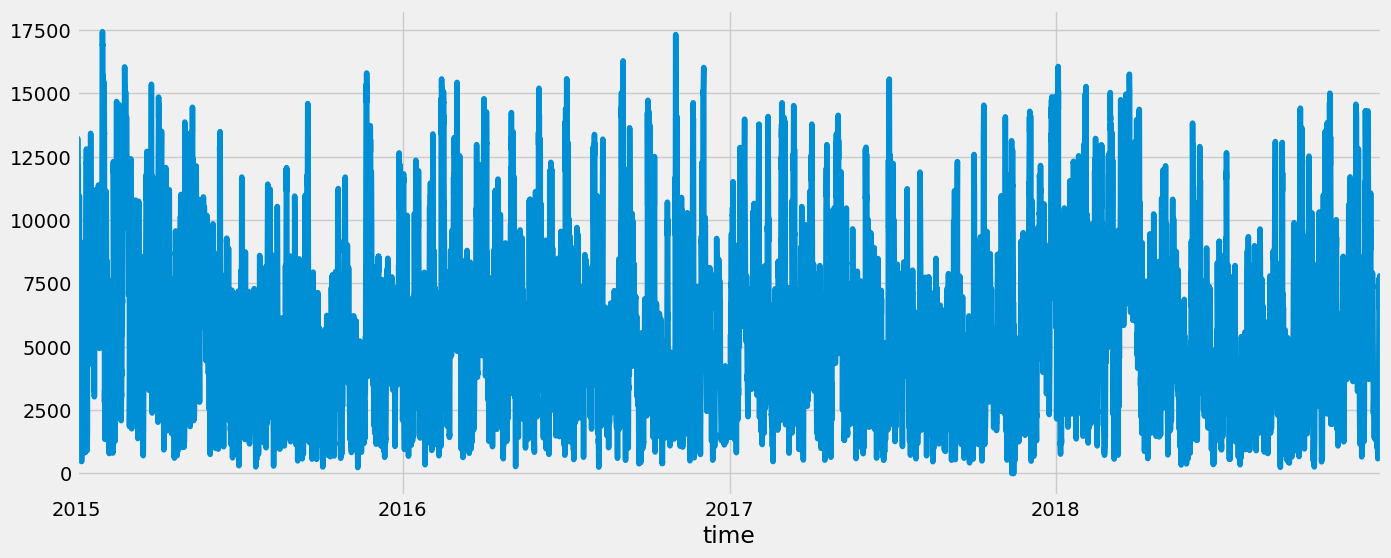

In [8]:
y_wind.plot(figsize=(15, 6))
plt.show()

In [9]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [10]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_solar_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.12664D+00    |proj g|=  1.70530D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.705D-08   9.127D+00
  F =   9.1266381697756831     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:480154.4341118987


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.18567D+00    |proj g|=  7.18260D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   4.395D-06   9.117D+00
  F =   9.1174704180972732     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:479674.1186960975


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.37587D+00    |proj g|=  1.48681D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.487D-07   9.376D+00
  F =   9.3758663811297502     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:493266.3303112362
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.



At iterate    5    f=  9.02627D+00    |proj g|=  7.41258D-02

At iterate   10    f=  9.02522D+00    |proj g|=  2.41100D-04

At iterate   15    f=  9.02519D+00    |proj g|=  2.09428D-02

At iterate   20    f=  9.02179D+00    |proj g|=  9.93806D-02

At iterate   25    f=  8.78715D+00    |proj g|=  2.59309D-01

At iterate   30    f=  8.78327D+00    |proj g|=  2.63230D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     30     59      1     0     0   2.632D-04   8.783D+00
  F =   8.7832731432231874     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:462092.0000649

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.10830D+00    |proj g|=  5.14717D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.147D-06   9.108D+00
  F =   9.1083020561388697     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:479191.77117346594


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.13766D+00    |proj g|=  4.54546D-01

At iterate    5    f=  8.91052D+00    |proj g|=  1.77101D+00

At iterate   10    f=  8.87836D+00    |proj g|=  2.40077D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     46      1     0     0   1.945D-02   8.878D+00
  F =   8.8783280545522274     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:467094.83894999267


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.15850D+00    |proj g|=  5.67187D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   5.672D-05   8.158D+00
  F =   8.1584971847060057     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:429222.536887383


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.15747D+00    |proj g|=  3.17087D-01

At iterate    5    f=  8.15422D+00    |proj g|=  6.18350D-02

At iterate   10    f=  8.15397D+00    |proj g|=  9.09743D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   9.097D-06   8.154D+00
  F =   8.1539678226340335     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:428986.24714877654
RUNNING THE L-

 This problem is unconstrained.



At iterate    5    f=  8.73289D+00    |proj g|=  1.97724D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     19      1     0     0   3.305D-04   8.733D+00
  F =   8.7328638363970548     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:459439.96643284906
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.36920D+00    |proj g|=  4.42408D-01


 This problem is unconstrained.



At iterate    5    f=  8.72828D+00    |proj g|=  9.00091D-02

At iterate   10    f=  8.72720D+00    |proj g|=  3.89372D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     24      1     0     0   3.319D-04   8.727D+00
  F =   8.7272037050720606     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:459144.1869238411


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.55846D+00    |proj g|=  4.76452D-01

At iterate    5    f=  8.98126D+00    |proj g|=  8.02747D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     31      1     0     0   3.895D-03   8.981D+00
  F =   8.9812453166615409     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:472507.3161095637
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.51366D+00    |proj g|=  5.04125D-01

At iterate    5    f=  8.88530D+00    |proj g|=  8.81186D-02

At iterate   10    f=  8.88468D+00    |proj g|=  3.26994D-04

At iterate   15    f=  8.88467D+00    |proj g|=  3.89139D-03

At iterate   20    f=  8.88408D+00    |proj g|=  3.11988D-02

At iterate   25    f=  8.87258D+00    |proj g|=  9.86136D-02

At iterate   30    f=  8.50322D+00    |proj g|=  1.48840D+00

At iterate   35    f=  8.15096D+00    |proj g|=  1.54495D-01

At iterate   40    f=  8.14353D+00    |proj g|=  6.68055D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     

 This problem is unconstrained.



At iterate    5    f=  8.72522D+00    |proj g|=  7.10472D-02

At iterate   10    f=  8.72478D+00    |proj g|=  6.34448D-03

At iterate   15    f=  8.72477D+00    |proj g|=  1.43324D-03

At iterate   20    f=  8.72475D+00    |proj g|=  2.15848D-02

At iterate   25    f=  8.72108D+00    |proj g|=  3.07067D-01

At iterate   30    f=  8.48378D+00    |proj g|=  4.81174D-01

At iterate   35    f=  8.45276D+00    |proj g|=  7.05142D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     51      1     0     0   4.701D-06   8.453D+00
  F =   8.4527550682347350     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.36347D+00    |proj g|=  4.46178D-01

At iterate    5    f=  8.72513D+00    |proj g|=  9.05235D-02

At iterate   10    f=  8.71898D+00    |proj g|=  8.08810D-02

At iterate   15    f=  8.67260D+00    |proj g|=  1.01252D-01

At iterate   20    f=  8.66140D+00    |proj g|=  4.31813D-02

At iterate   25    f=  8.65989D+00    |proj g|=  3.59690D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     69      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.49660D+00    |proj g|=  5.16373D-01

At iterate    5    f=  8.85394D+00    |proj g|=  8.67754D-04

At iterate   10    f=  8.85310D+00    |proj g|=  2.34394D-02

At iterate   15    f=  8.80293D+00    |proj g|=  2.35756D-01

At iterate   20    f=  7.58163D+00    |proj g|=  2.95055D-01

At iterate   25    f=  7.57660D+00    |proj g|=  4.87874D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     44      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  8.85309D+00    |proj g|=  3.49560D-04

At iterate   10    f=  8.85302D+00    |proj g|=  3.92263D-03

At iterate   15    f=  8.84839D+00    |proj g|=  2.81433D-02

At iterate   20    f=  8.81740D+00    |proj g|=  7.42104D-01

At iterate   25    f=  7.92652D+00    |proj g|=  4.96181D+00

At iterate   30    f=  7.82396D+00    |proj g|=  9.69053D-01

At iterate   35    f=  7.65651D+00    |proj g|=  1.36673D-01

At iterate   40    f=  7.61518D+00    |proj g|=  7.49235D-02

At iterate   45    f=  7.59973D+00    |proj g|=  9.96276D-02

At iterate   50    f=  7.59031D+00    |proj g|=  4.93270D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:404141.7242273919
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.66768D+00    |proj g|=  2.48172D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      7      1     0     0   3.738D-05   7.668D+00
  F =   7.6675651373838640     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:403394.6018777651


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.13184D+00    |proj g|=  6.43041D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   6.430D-07   8.132D+00
  F =   8.1318352175550217     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:427817.85079556966


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.76118D+00    |proj g|=  7.07170D-01

At iterate    5    f=  7.74895D+00    |proj g|=  2.88941D-03

At iterate   10    f=  7.74895D+00    |proj g|=  6.40906D-03

At iterate   15    f=  7.74864D+00    |proj g|=  6.96448D-02

At iterate   20    f=  7.73928D+00    |proj g|=  1.93027D-01

At iterate   25    f=  7.53599D+00    |proj g|=  1.61873D-01

At iterate   30    f=  7.51373D+00    |proj g|=  2.61421D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.64915D+00    |proj g|=  5.30260D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.303D-06   7.649D+00
  F =   7.6491535215934476     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:402425.96677103126
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variabl

 This problem is unconstrained.



At iterate    5    f=  7.44114D+00    |proj g|=  1.95791D-01

At iterate   10    f=  7.42749D+00    |proj g|=  1.33596D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     30      1     0     0   8.646D-04   7.427D+00
  F =   7.4274030004231406     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:390761.6718522614


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01735D+00    |proj g|=  4.62082D-05



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     13      1     0     0   4.619D-05   7.017D+00
  F =   7.0173507821781280     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:369186.8246503913
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01141D+00    |proj g|=  5.98976D-02


 This problem is unconstrained.



At iterate    5    f=  7.00374D+00    |proj g|=  1.89014D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   8.670D-05   7.004D+00
  F =   7.0037416950225131     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:368472.8505751344


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35668D+00    |proj g|=  1.45022D-01

At iterate    5    f=  7.29246D+00    |proj g|=  7.03144D-04

At iterate   10    f=  7.29239D+00    |proj g|=  2.05135D-02

At iterate   15    f=  7.28471D+00    |proj g|=  2.21531D-01

At iterate   20    f=  7.27491D+00    |proj g|=  2.52207D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     21     27      1     0     0   2.021D-05   7.275D+00
  F =   7.2749124093492004     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  7.35040D+00    |proj g|=  1.00221D-03

At iterate   10    f=  7.35035D+00    |proj g|=  2.81630D-02

At iterate   15    f=  7.34248D+00    |proj g|=  4.01398D-01

At iterate   20    f=  7.27048D+00    |proj g|=  1.57632D-01

At iterate   25    f=  7.26604D+00    |proj g|=  1.91071D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   1.911D-05   7.266D+00
  F =   7.2660373957061930     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:382272.2273881028
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  7.73127D+00    |proj g|=  5.19714D-02

At iterate   10    f=  7.68896D+00    |proj g|=  1.72252D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     20      1     0     0   3.650D-07   7.689D+00
  F =   7.6888857464041314     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:404516.27911832137
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.68023D+00    |proj g|=  8.14560D-01


 This problem is unconstrained.



At iterate    5    f=  7.52723D+00    |proj g|=  8.46267D-02

At iterate   10    f=  7.52006D+00    |proj g|=  1.55301D-02

At iterate   15    f=  7.52002D+00    |proj g|=  2.98677D-03

At iterate   20    f=  7.51820D+00    |proj g|=  4.44775D-02

At iterate   25    f=  7.45005D+00    |proj g|=  3.94263D-01

At iterate   30    f=  7.13947D+00    |proj g|=  5.71269D-02

At iterate   35    f=  7.13792D+00    |proj g|=  7.85387D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     66      1     0     0   4.002D-05   7.138D+00
  F =   7.1379170547700461     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35433D+00    |proj g|=  7.00728D-02

At iterate    5    f=  7.34925D+00    |proj g|=  1.02720D-03

At iterate   10    f=  7.34922D+00    |proj g|=  2.03415D-02

At iterate   15    f=  7.34588D+00    |proj g|=  1.97540D-01

At iterate   20    f=  7.27856D+00    |proj g|=  1.77492D-01

At iterate   25    f=  7.25859D+00    |proj g|=  2.83026D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     32      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  7.33680D+00    |proj g|=  9.42477D-02

At iterate   10    f=  7.27296D+00    |proj g|=  1.41294D-01

At iterate   15    f=  7.26047D+00    |proj g|=  7.71978D-02

At iterate   20    f=  7.25965D+00    |proj g|=  1.40917D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     36      1     0     0   1.409D-03   7.260D+00
  F =   7.2596456274761119     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:381937.95646151825


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.65209D+00    |proj g|=  5.71303D-01

At iterate    5    f=  7.47634D+00    |proj g|=  1.31247D-03

At iterate   10    f=  7.47578D+00    |proj g|=  2.63228D-02

At iterate   15    f=  7.41544D+00    |proj g|=  3.33861D-01

At iterate   20    f=  6.92848D+00    |proj g|=  7.63147D-01

At iterate   25    f=  6.87112D+00    |proj g|=  7.08080D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     34      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.65127D+00    |proj g|=  5.67247D-01

At iterate    5    f=  7.47434D+00    |proj g|=  4.84273D-03

At iterate   10    f=  7.47345D+00    |proj g|=  2.31898D-03

At iterate   15    f=  7.46973D+00    |proj g|=  4.73851D-02

At iterate   20    f=  7.31111D+00    |proj g|=  3.87842D-01

At iterate   25    f=  6.86260D+00    |proj g|=  4.42591D-02

At iterate   30    f=  6.85309D+00    |proj g|=  5.36565D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     15      1     0     0   9.112D-05   7.675D+00
  F =   7.6750764471498618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:403789.77188455424
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.85409D+00    |proj g|=  1.27634D+00


 This problem is unconstrained.



At iterate    5    f=  7.66132D+00    |proj g|=  3.93361D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   3.934D-05   7.661D+00
  F =   7.6613237728537475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:403068.24368983565
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.12163D+00    |proj g|=  6.14806D-05


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     14      1     0     0   6.132D-05   8.122D+00
  F =   8.1216290775914750     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:427282.9057720875


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.80044D+00    |proj g|=  1.83822D-01

At iterate    5    f=  7.76508D+00    |proj g|=  3.48313D-02

At iterate   10    f=  7.76499D+00    |proj g|=  3.18638D-03

At iterate   15    f=  7.76483D+00    |proj g|=  4.67983D-02

At iterate   20    f=  7.75673D+00    |proj g|=  2.01700D-01

At iterate   25    f=  7.61422D+00    |proj g|=  4.50152D-01

At iterate   30    f=  7.50418D+00    |proj g|=  7.32025D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  7.64412D+00    |proj g|=  1.05341D-04

At iterate   10    f=  7.64410D+00    |proj g|=  2.01900D-02

At iterate   15    f=  7.64343D+00    |proj g|=  6.32233D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     25      1     0     0   2.701D-06   7.643D+00
  F =   7.6433323413027621     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:402121.7144759383
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  7.48238D+00    |proj g|=  8.07433D-01
  ys=-1.591E-01  -gs= 6.798E-02 BFGS update SKIPPED

At iterate   10    f=  7.43682D+00    |proj g|=  3.83863D-01

At iterate   15    f=  7.43582D+00    |proj g|=  1.57480D-03

At iterate   20    f=  7.43581D+00    |proj g|=  7.18938D-02

At iterate   25    f=  7.43465D+00    |proj g|=  8.94846D-01

At iterate   30    f=  7.41398D+00    |proj g|=  1.30082D+00

At iterate   35    f=  7.35814D+00    |proj g|=  1.76852D-01

At iterate   40    f=  7.35225D+00    |proj g|=  2.17799D-01

At iterate   45    f=  7.35217D+00    |proj g|=  4.30483D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.67226D+00    |proj g|=  1.03491D-02

At iterate    5    f=  7.67210D+00    |proj g|=  7.40826D-03

At iterate   10    f=  7.66372D+00    |proj g|=  1.08696D-01

At iterate   15    f=  7.19455D+00    |proj g|=  1.71453D+00

At iterate   20    f=  7.00453D+00    |proj g|=  4.33767D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     32      1     0     0   2.230D-06   7.004D+00
  F =   7.0044775678760054     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.67515D+00    |proj g|=  1.82595D-02

At iterate    5    f=  7.67137D+00    |proj g|=  2.04550D-02

At iterate   10    f=  7.67080D+00    |proj g|=  1.09331D-03

At iterate   15    f=  7.67033D+00    |proj g|=  1.60713D-02

At iterate   20    f=  7.62264D+00    |proj g|=  2.14497D-01

At iterate   25    f=  7.03741D+00    |proj g|=  8.48129D-01

At iterate   30    f=  6.99255D+00    |proj g|=  1.12029D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  7.35185D+00    |proj g|=  1.00983D-03

At iterate   10    f=  7.35179D+00    |proj g|=  1.89013D-02

At iterate   15    f=  7.34497D+00    |proj g|=  2.07388D-01

At iterate   20    f=  7.28172D+00    |proj g|=  1.66015D-01

At iterate   25    f=  7.26549D+00    |proj g|=  1.57718D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     33      1     0     0   1.117D-07   7.265D+00
  F =   7.2654861119752958     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:382243.2243510203
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  7.34753D+00    |proj g|=  1.10725D-03

At iterate   10    f=  7.34751D+00    |proj g|=  4.92006D-03

At iterate   15    f=  7.34505D+00    |proj g|=  7.05996D-02

At iterate   20    f=  7.27022D+00    |proj g|=  2.77704D-01

At iterate   25    f=  7.25707D+00    |proj g|=  4.00708D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     32      1     0     0   3.687D-06   7.257D+00
  F =   7.2570681338971008     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:381802.35452432645
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.



At iterate    5    f=  7.76540D+00    |proj g|=  6.66812D-04

At iterate   10    f=  7.76521D+00    |proj g|=  2.02568D-02

At iterate   15    f=  7.74434D+00    |proj g|=  3.09034D-01

At iterate   20    f=  7.67488D+00    |proj g|=  1.23556D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   1.403D-06   7.675D+00
  F =   7.6748669190632732     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:403780.7486119188


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.68044D+00    |proj g|=  2.16779D+00

At iterate    5    f=  7.59314D+00    |proj g|=  4.86192D-02

At iterate   10    f=  7.59197D+00    |proj g|=  1.13264D-03

At iterate   15    f=  7.59182D+00    |proj g|=  1.18650D-02

At iterate   20    f=  7.56438D+00    |proj g|=  3.81682D-01

At iterate   25    f=  7.16000D+00    |proj g|=  3.85414D-01

At iterate   30    f=  7.12446D+00    |proj g|=  1.31826D-01

At iterate   35    f=  7.12421D+00    |proj g|=  6.08029D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  7.34650D+00    |proj g|=  2.93736D-03

At iterate   10    f=  7.34649D+00    |proj g|=  7.16606D-03

At iterate   15    f=  7.34592D+00    |proj g|=  9.03759D-02

At iterate   20    f=  7.28416D+00    |proj g|=  2.60087D-01

At iterate   25    f=  7.25199D+00    |proj g|=  7.63997D-02

At iterate   30    f=  7.24994D+00    |proj g|=  1.95127D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     41      1     0     0   1.951D-05   7.250D+00
  F =   7.2499445764046575     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:381427.5841646

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39763D+00    |proj g|=  3.67146D-01

At iterate    5    f=  7.34810D+00    |proj g|=  6.09088D-03

At iterate   10    f=  7.30059D+00    |proj g|=  4.03526D-01

At iterate   15    f=  7.26123D+00    |proj g|=  3.78210D-01

At iterate   20    f=  7.25914D+00    |proj g|=  1.23054D-02

At iterate   25    f=  7.25914D+00    |proj g|=  2.73683D-03

At iterate   30    f=  7.25907D+00    |proj g|=  1.14326D-01

At iterate   35    f=  7.25157D+00    |proj g|=  6.39000D-01

At iterate   40    f=  7.13604D+00    |proj g|=  3.62935D-01

At iterate   45    f=  7.03450D+00    |proj g|=  5.40194D-01

At iterate   50    f=  7.03380D+00    |proj g|=  3.99248D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  7.55597D+00    |proj g|=  1.63527D-02

At iterate   10    f=  7.55522D+00    |proj g|=  1.07291D-02

At iterate   15    f=  7.49667D+00    |proj g|=  2.85060D-01

At iterate   20    f=  6.86893D+00    |proj g|=  9.16700D-02

At iterate   25    f=  6.84998D+00    |proj g|=  3.23623D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     32      1     0     0   2.316D-06   6.850D+00
  F =   6.8499757431844150     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:360385.2238489321


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.64810D+00    |proj g|=  9.44892D-01

At iterate    5    f=  7.55898D+00    |proj g|=  2.92101D-02

At iterate   10    f=  7.55426D+00    |proj g|=  1.61566D-02

At iterate   15    f=  7.55370D+00    |proj g|=  2.04483D-03

At iterate   20    f=  7.55078D+00    |proj g|=  2.73456D-02

At iterate   25    f=  7.35153D+00    |proj g|=  5.49836D-01

At iterate   30    f=  6.87806D+00    |proj g|=  1.79077D-01

At iterate   35    f=  6.84469D+00    |proj g|=  6.25648D-02

At iterate   40    f=  6.83552D+00    |proj g|=  2.12353D-02

At iterate   45    f=  6.83471D+00    |proj g|=  4.48767D-03

At iterate   50    f=  6.83470D+00    |proj g|=  6.00801D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18808D+00    |proj g|=  1.34216D-05



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   1.339D-05   7.188D+00
  F =   7.1880841271046352     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:378169.10592697485
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.20180D+00    |proj g|=  2.96329D-01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   3.750D-06   7.184D+00
  F =   7.1842041241906420     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:377966.9789736697
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49895D+00    |proj g|=  1.77314D-05


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     13      1     0     0   1.769D-05   7.499D+00
  F =   7.4989548906096282     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:394524.01679497253


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19688D+00    |proj g|=  4.10388D-01

At iterate    5    f=  7.18346D+00    |proj g|=  1.95142D-02

At iterate   10    f=  7.18336D+00    |proj g|=  1.10514D-02

At iterate   15    f=  7.17811D+00    |proj g|=  1.05867D-01

At iterate   20    f=  7.08506D+00    |proj g|=  3.79038D-01

At iterate   25    f=  7.00511D+00    |proj g|=  2.24010D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     38      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.22586D+00    |proj g|=  2.91311D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   9.068D-06   7.183D+00
  F =   7.1833526424230634     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:377922.1825178774


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18389D+00    |proj g|=  1.09454D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     18      1     0     0   2.476D-01   7.116D+00
  F =   7.1158280954696824     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:374371.71610266
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables 

 This problem is unconstrained.



At iterate    5    f=  7.13864D+00    |proj g|=  1.62661D-03

At iterate   10    f=  7.13815D+00    |proj g|=  3.18381D-02

At iterate   15    f=  7.07833D+00    |proj g|=  4.48668D-01

At iterate   20    f=  6.87094D+00    |proj g|=  4.81540D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   1.767D-06   6.870D+00
  F =   6.8695092413848755     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:361410.8811892583
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  7.13440D+00    |proj g|=  8.27992D-03

At iterate   10    f=  7.13379D+00    |proj g|=  9.00887D-03

At iterate   15    f=  7.12225D+00    |proj g|=  7.38600D-02

At iterate   20    f=  6.88692D+00    |proj g|=  2.07396D-01

At iterate   25    f=  6.85602D+00    |proj g|=  4.74745D-02

At iterate   30    f=  6.85355D+00    |proj g|=  1.31815D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     38      1     0     0   1.318D-06   6.854D+00
  F =   6.8535462350169958     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:360573.0674242

 This problem is unconstrained.



At iterate    5    f=  7.09144D+00    |proj g|=  3.46303D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   3.463D-05   7.091D+00
  F =   7.0914397627197934     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:373086.6459166883
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10010D+00    |proj g|=  1.97258D-01


 This problem is unconstrained.



At iterate    5    f=  7.08825D+00    |proj g|=  3.43020D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      8      1     0     0   3.430D-05   7.088D+00
  F =   7.0882502186993106     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:372920.84400577075
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42872D+00    |proj g|=  4.65184D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   9.126D-06   7.428D+00
  F =   7.4278606117505950     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:390785.7467841988
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13673D+00    |proj g|=  4.02107D-01


 This problem is unconstrained.



At iterate    5    f=  7.12059D+00    |proj g|=  1.28722D-02

At iterate   10    f=  7.12049D+00    |proj g|=  1.48299D-03

At iterate   15    f=  7.11865D+00    |proj g|=  4.67784D-02

At iterate   20    f=  7.00514D+00    |proj g|=  3.19087D-01

At iterate   25    f=  6.95824D+00    |proj g|=  2.09187D-02

At iterate   30    f=  6.95819D+00    |proj g|=  2.38316D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     40      1     0     0   2.383D-06   6.958D+00
  F =   6.9581936684640109     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:366078.5688978

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11687D+00    |proj g|=  2.25712D-01

At iterate    5    f=  7.08850D+00    |proj g|=  9.40283D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      8      1     0     0   3.443D-05   7.089D+00
  F =   7.0885017365656733     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:372934.0763607201
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N

 This problem is unconstrained.



At iterate    5    f=  7.06805D+00    |proj g|=  1.69589D-01

At iterate   10    f=  7.00261D+00    |proj g|=  4.58401D-01

At iterate   15    f=  6.98180D+00    |proj g|=  3.13919D-02

At iterate   20    f=  6.98164D+00    |proj g|=  7.66763D-04

At iterate   25    f=  6.98119D+00    |proj g|=  1.12384D-01

At iterate   30    f=  6.97333D+00    |proj g|=  4.42095D-01

At iterate   35    f=  6.96681D+00    |proj g|=  3.56236D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     57      1     0     0   9.872D-05   6.967D+00
  F =   6.9667907204026420     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14717D+00    |proj g|=  2.25691D-01

At iterate    5    f=  7.08412D+00    |proj g|=  8.32899D-03

At iterate   10    f=  7.08360D+00    |proj g|=  9.61367D-03

At iterate   15    f=  7.07363D+00    |proj g|=  1.71409D-01

At iterate   20    f=  6.86348D+00    |proj g|=  4.07088D-02

At iterate   25    f=  6.85542D+00    |proj g|=  2.83101D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     28      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14535D+00    |proj g|=  2.23278D-01

At iterate    5    f=  7.07730D+00    |proj g|=  6.48545D-03

At iterate   10    f=  7.07639D+00    |proj g|=  1.09434D-02

At iterate   15    f=  7.05571D+00    |proj g|=  1.53432D-01

At iterate   20    f=  6.84604D+00    |proj g|=  1.17086D-01

At iterate   25    f=  6.83548D+00    |proj g|=  5.77555D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     35      1     0     0   

In [12]:
''''The lowest AIC value for parameters: 
p = 1
d = 1
q = 1 
seasonal ARIMA: 1, 1, 1, 12
'''
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:359624.6419099074


In [13]:
mod = sm.tsa.statespace.SARIMAX(y_solar_train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14535D+00    |proj g|=  2.23278D-01

At iterate    5    f=  7.07730D+00    |proj g|=  6.48545D-03

At iterate   10    f=  7.07639D+00    |proj g|=  1.09434D-02

At iterate   15    f=  7.05571D+00    |proj g|=  1.53432D-01

At iterate   20    f=  6.84604D+00    |proj g|=  1.17086D-01

At iterate   25    f=  6.83548D+00    |proj g|=  5.77555D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     35      1     0     0   

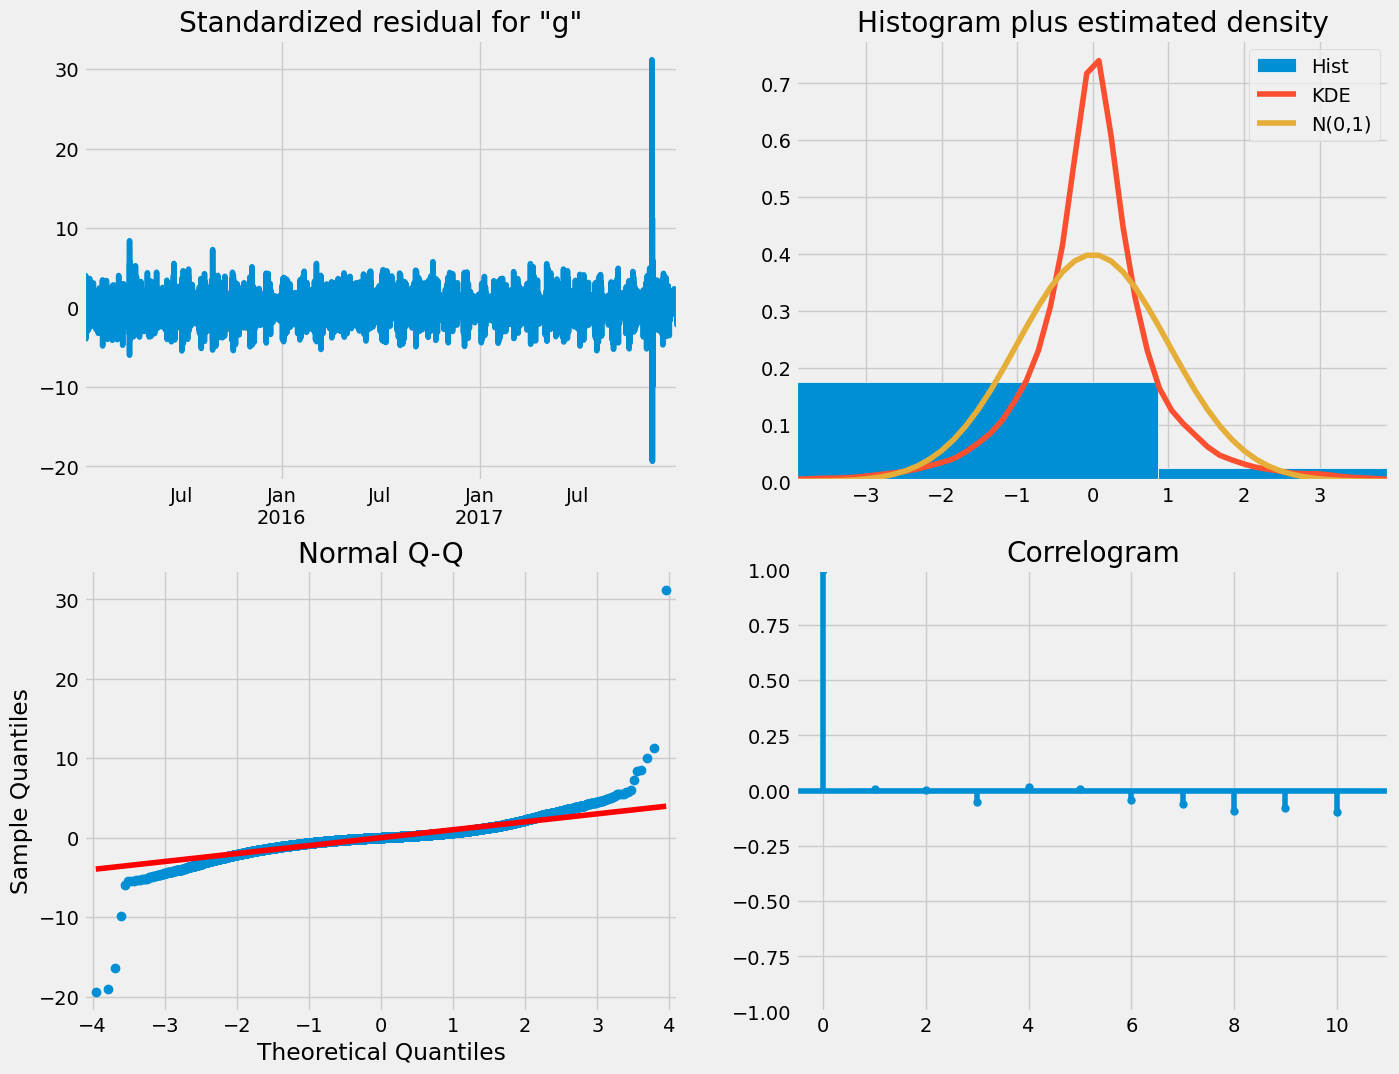

In [14]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [18]:
# Forecasting
forecast_start = len(y_solar_train)
forecast_end = forecast_start + len(y_solar_test) - 1  # Assuming y_solar_test is your test dataset

# Get the predicted values
pred = results.get_prediction(start=forecast_start, end=forecast_end, dynamic=False)
y_pred = pred.predicted_mean

In [19]:
# Evaluating MSE
mse = mean_squared_error(y_solar_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 7432945086.34872


In [20]:
mse_by_hand = ((y_pred - y_solar_test) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 7432945086.35


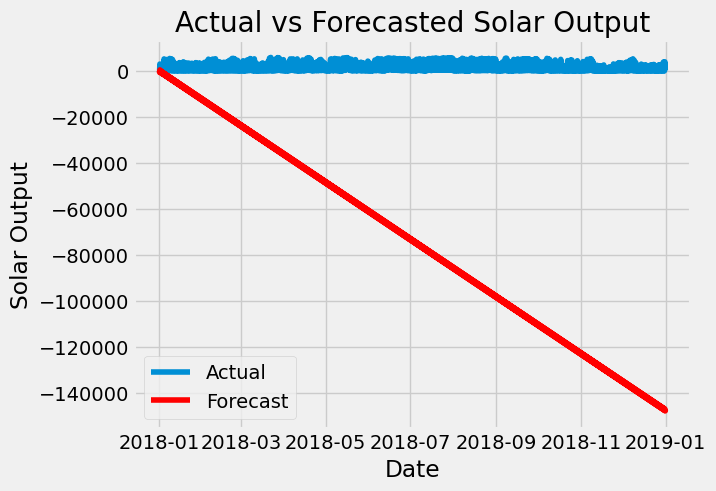

In [21]:
# Plot actual values
plt.plot(y_solar_test.index, y_solar_test, label='Actual')

# Plot forecasted values
plt.plot(y_solar_test.index, y_pred, color='red', label='Forecast')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Solar Output')
plt.title('Actual vs Forecasted Solar Output')
plt.legend()

# Show plot
plt.show()
